In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("21-housing.csv")

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
df.shape

(20640, 10)

In [8]:
def find_outliers_iqr(df,threshold=1.5):
    outliers_summary = {}
    numeric_cols = df.select_dtypes(include=["float64","int64"]).columns
    for col in numeric_cols:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR = Q3-Q1
        lower_bound = Q1 - IQR*threshold
        upper_bound = Q3 + IQR*threshold
        outliers_df = df[(df[col]<lower_bound) | (df[col]>upper_bound)]
        outliers_summary[col]={
            "outliers_count":outliers_df.shape[0],
            "outlier_percentage":outliers_df.shape[0]/df.shape[0],
            "lower_bound": lower_bound,
            "upper_bound":upper_bound
        }
    return pd.DataFrame(outliers_summary)
       

In [9]:
find_outliers_iqr(df)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
outliers_count,0.000,0.00,0.0,1287.000000,1271.000000,1196.000000,1220.000000,681.000000,1071.00000
outlier_percentage,0.000,0.00,0.0,0.062355,0.061579,0.057946,0.059109,0.032994,0.05189
lower_bound,-127.485,28.26,-10.5,-1102.625000,-230.500000,-620.000000,-207.500000,-0.706375,-98087.50000
upper_bound,-112.325,43.38,65.5,5698.375000,1173.500000,3132.000000,1092.500000,8.013025,482412.50000


In [10]:
def remove_outliers_from_all_columns(df,threshold=1.5):
    df_clean = df.copy()
    numeric_cols = df.select_dtypes(include=["float64","int64"]).columns
    for col in numeric_cols:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR = Q3-Q1
        lower_bound = Q1 - IQR*threshold
        upper_bound = Q3 + IQR*threshold
        df_clean = df_clean[(df_clean[col]>=lower_bound) & (df_clean[col]<=upper_bound)]
    return df_clean.copy()

In [11]:
df_clean = remove_outliers_from_all_columns(df)

In [12]:
df_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY


In [13]:
df_clean.shape

(17446, 10)

In [14]:
df_clean["total_bedrooms"] = df_clean["total_bedrooms"].fillna(df["total_bedrooms"].median())

In [15]:
df_clean.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [16]:
df_clean["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     7529
INLAND        5820
NEAR OCEAN    2206
NEAR BAY      1886
ISLAND           5
Name: count, dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le = LabelEncoder()

In [19]:
df_clean["ocean_proximity"] = le.fit_transform(df_clean["ocean_proximity"])

In [20]:
df_clean["ocean_proximity"].value_counts()

ocean_proximity
0    7529
1    5820
4    2206
3    1886
2       5
Name: count, dtype: int64

In [21]:
df_clean.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [22]:
import math 
def hist_all_columns(df):
    columns = list(df.columns)
    number_of_cols = 3
    number_of_rows = math.ceil(len(columns)/3)
    fig,axes = plt.subplots(ncols=number_of_cols, nrows=number_of_rows, figsize=(10,15))
    for i,col in enumerate(columns):
        c = i % 3
        r = i // 3
        sns.histplot(data=df[col], ax=axes[r, c], kde=True, bins=30)    
    plt.tight_layout()
    plt.show()

In [23]:
def hist_all_columns(df, title_prefix):
    number_of_cols = df.select_dtypes(include=[np.number]).columns
    num_cols = 3
    num_rows = math.ceil(len(list(number_of_cols))/num_cols)
    plt.figure(figsize=(5*num_cols, 4*num_rows))
    for i, col in enumerate(number_of_cols, 1):
        plt.subplot(num_rows,num_cols,i)
        sns.histplot(data=df[col], kde=True)
        plt.title(f"{title_prefix}-{col}")
        plt.xlabel("")
        plt.ylabel("")
    plt.tight_layout()
    plt.show()

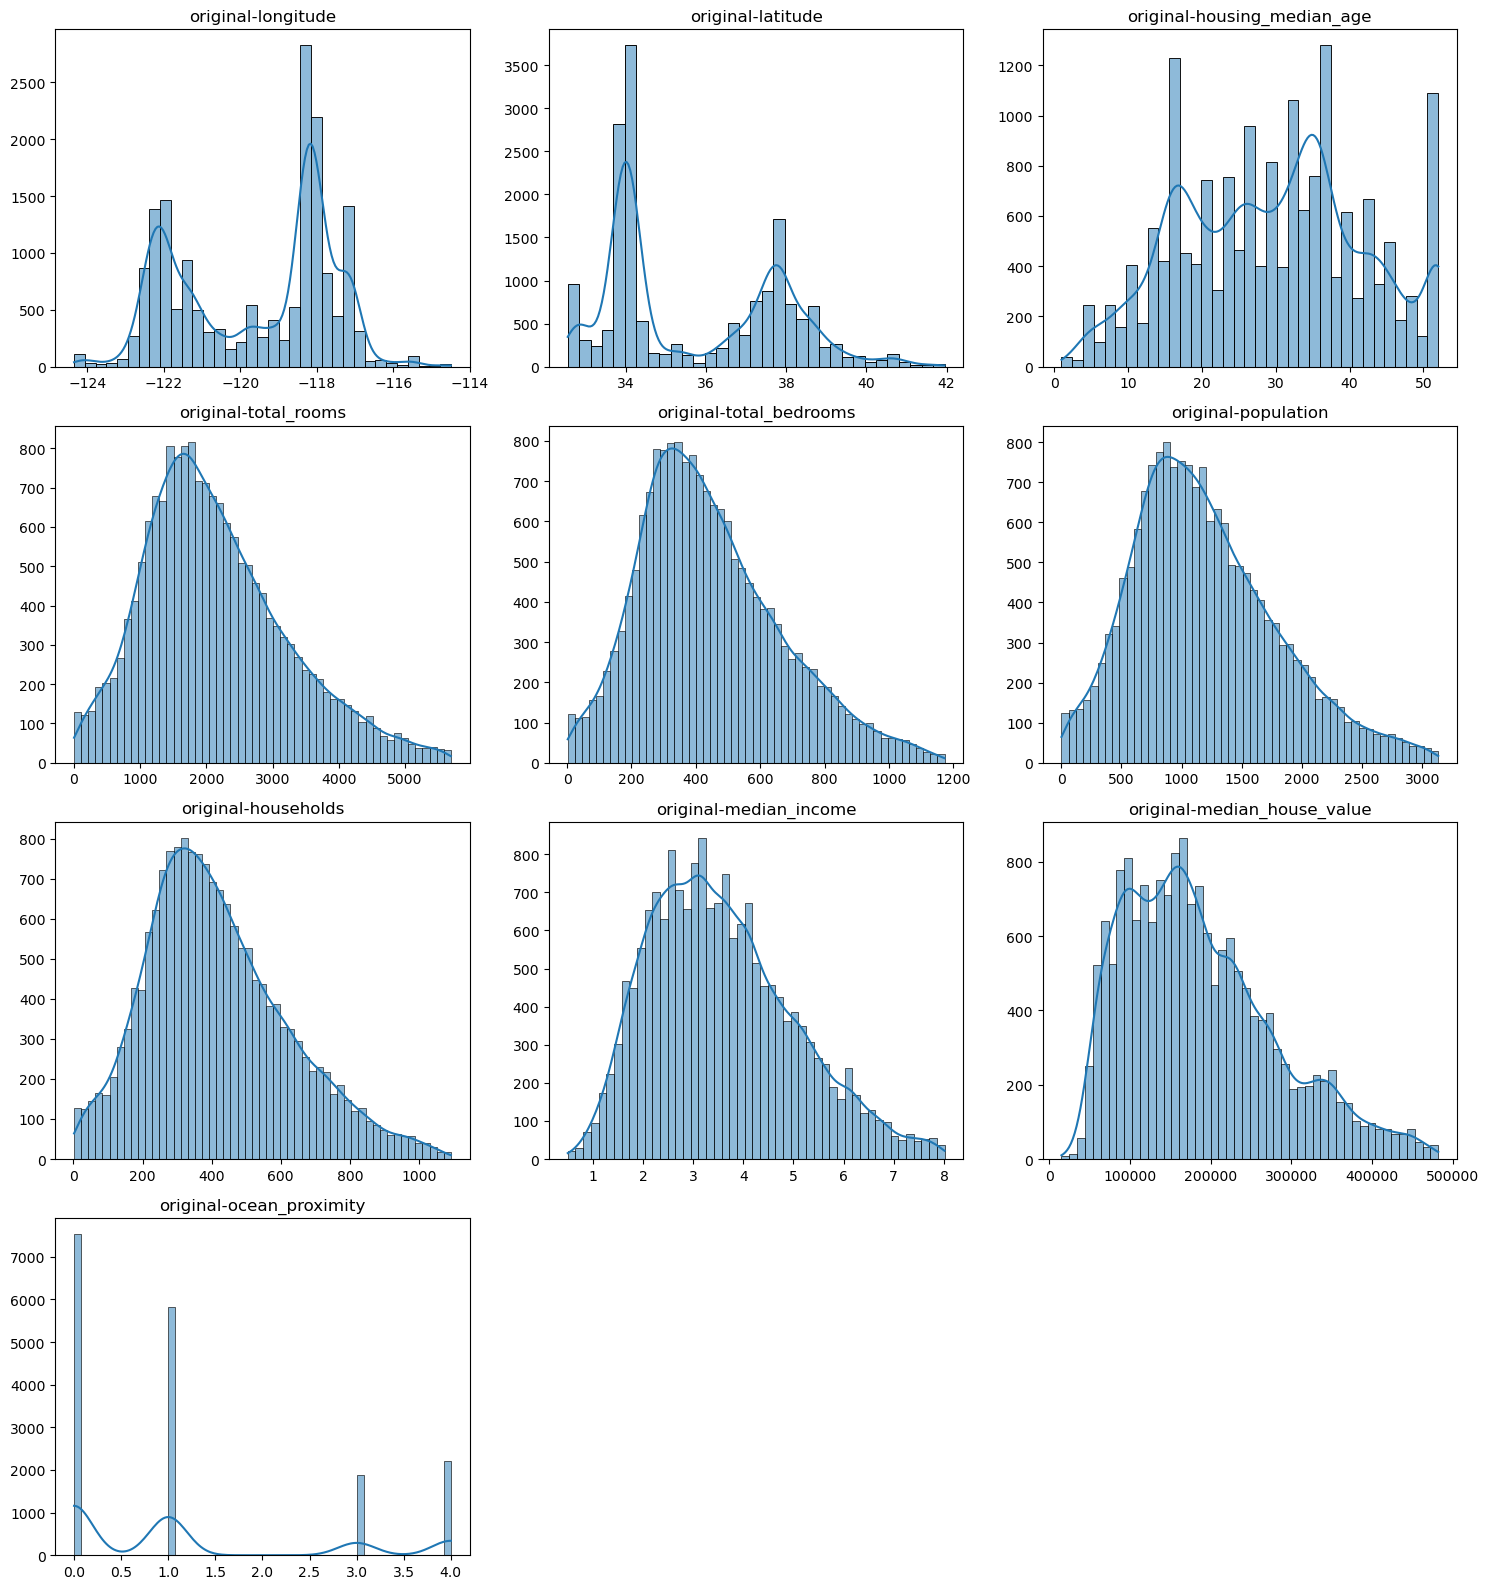

In [24]:
hist_all_columns(df_clean,"original")

In [25]:
# columns to transfom ---> total_rooms,total_bedrooms,population,households,median_income,median_house_value

In [26]:
df.corr(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = df_clean.drop("median_house_value",axis=1)
y = df_clean["median_house_value"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=15)

In [30]:
from sklearn.preprocessing import PowerTransformer

In [31]:
pt_x = PowerTransformer(method="yeo-johnson")

In [32]:
X_train_transformed = pt_x.fit_transform(X_train)
X_test_transformed = pt_x.transform(X_test)

In [33]:
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","ocean_proximity"])

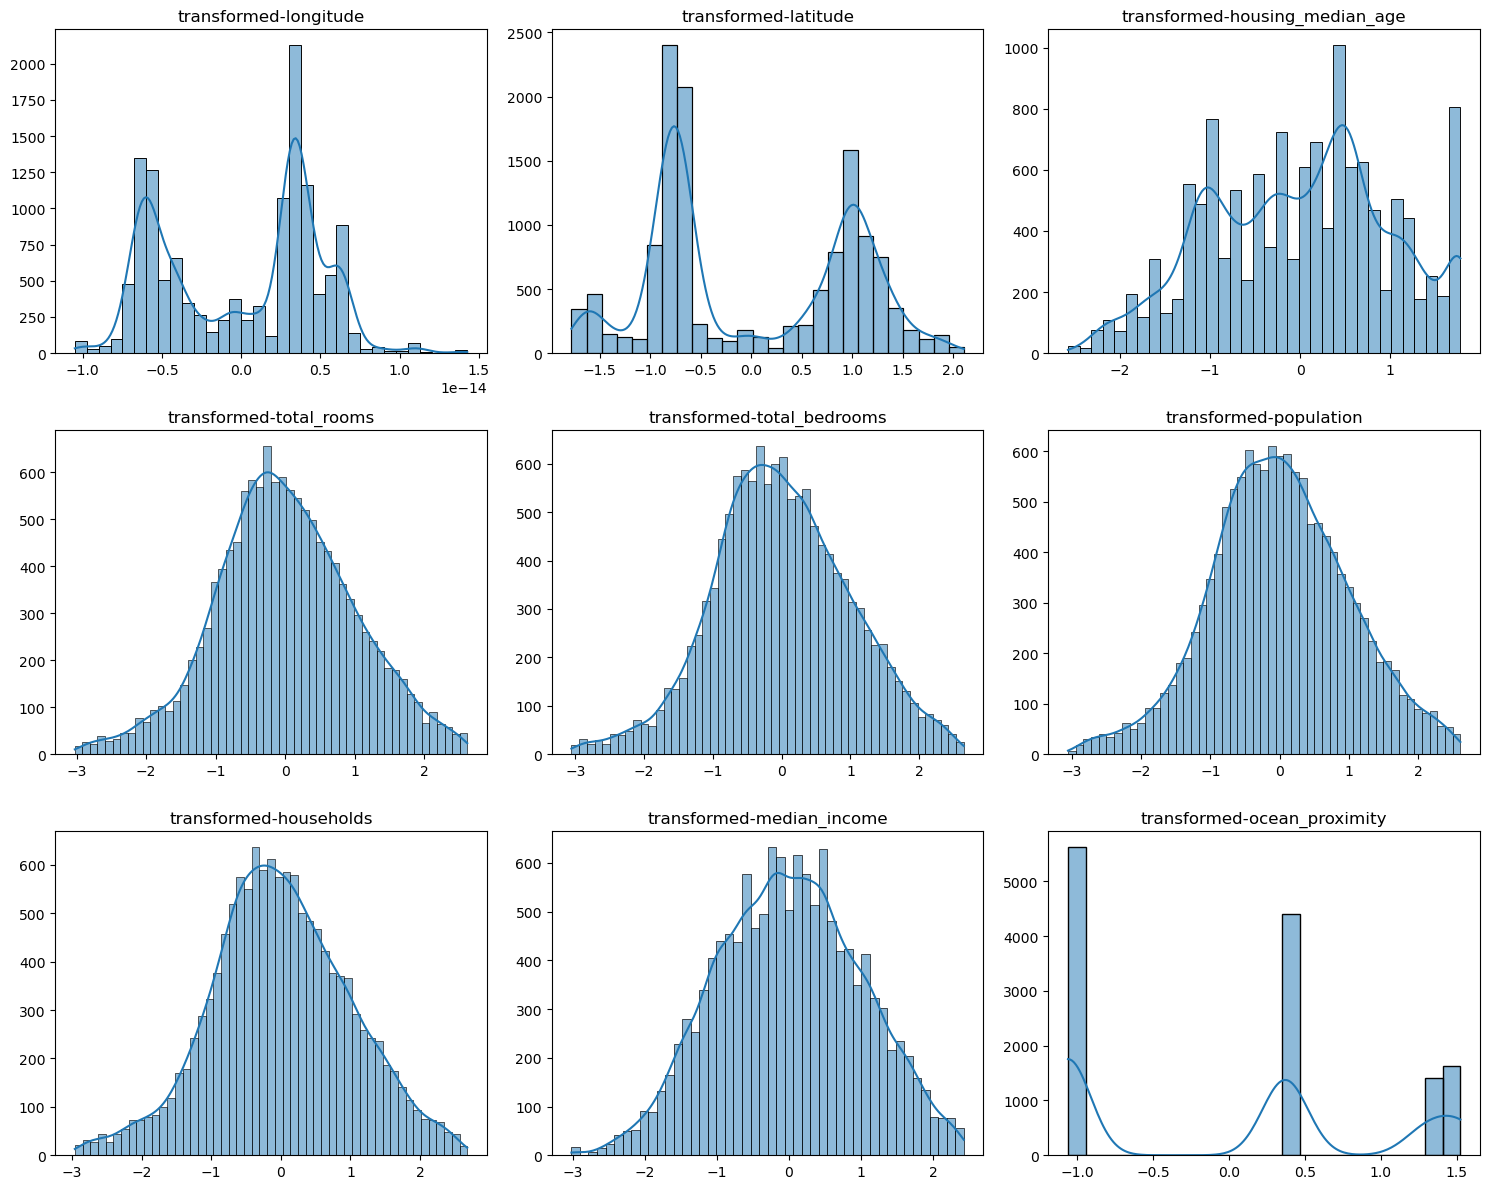

In [34]:
hist_all_columns(X_train_transformed_df,"transformed")

In [35]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

In [36]:
from scipy.stats import boxcox

In [37]:
y_train_transformed, lambda_y = boxcox(y_train)

In [38]:
def inverse_boxcox(y, lambda_):
    if lambda_==0:
        return np.exp(y)
    else:
        return np.power(y*lambda_+1, 1/lambda_)

In [39]:
params = {
    "learning_rate":[0.01,0.1],
    "max_depth":[5,8,12,20,30],
    "n_estimators":[100,200,300,500],
    "colsample_bytree":[0.3, 0.4, 0.5,0.7,1]
}

In [40]:
rscv = RandomizedSearchCV(estimator=XGBRegressor(),param_distributions=params,cv=5,n_jobs=-1)

In [41]:
rscv.fit(X_train_transformed, y_train_transformed)

,estimator,"XGBRegressor(...ree=None, ...)"
,param_distributions,"{'colsample_bytree': [0.3, 0.4, ...], 'learning_rate': [0.01, 0.1], 'max_depth': [5, 8, ...], 'n_estimators': [100, 200, ...]}"
,n_iter,10
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [42]:
y_pred_transformed = rscv.predict(X_test_transformed)
y_pred_original = inverse_boxcox(y_pred_transformed, lambda_y)

In [43]:
print("r2 score: ", r2_score(y_test,y_pred_original))
print("mae: ", mean_absolute_error(y_test,y_pred_original))
print("mse: ", mean_squared_error(y_test,y_pred_original))

r2 score:  0.8026131912967072
mae:  27644.0537849337
mse:  1703381761.5646389


In [46]:
from lightgbm import LGBMRegressor

In [ ]:
params = {
     "num_leaves":[31,50,70],
    "max_depth":[-1,5,10],
    "learning_rate":[0.01,0.05,0.1],
    "n_estimators":[100,300,1000],
    "min_child_samples":[10,20,30],
    "subsample":[0.6,0.8,1.0],
    "colsample_bytree":[0.6,0.8,1.0],
    "reg_alpha":[0,0.5,1.0],
    "reg_lambda":[0,0.5,1.0],
}

In [47]:
random_search = RandomizedSearchCV(
    estimator=LGBMRegressor(verbosity=-1),
    param_distributions = params,
    cv=5,
    verbose=0,
    random_state=15,
    scoring="neg_root_mean_squared_error",
    n_jobs = -1
)

In [48]:
random_search.fit(X_train_transformed, y_train_transformed)

,estimator,LGBMRegressor(verbosity=-1)
,param_distributions,"{'colsample_bytree': [0.3, 0.4, ...], 'learning_rate': [0.01, 0.1], 'max_depth': [5, 8, ...], 'n_estimators': [100, 200, ...]}"
,n_iter,10
,scoring,'neg_root_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,15
,error_score,nan


In [49]:
y_pred_transformed2 = random_search.predict(X_test_transformed)
y_pred_original2 = inverse_boxcox(y_pred_transformed2, lambda_y)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [51]:
print("r2 score: ", r2_score(y_test,y_pred_original2))
print("mae: ", mean_absolute_error(y_test,y_pred_original2))
print("mse: ", mean_squared_error(y_test,y_pred_original2))

r2 score:  0.8120782591379576
mae:  26695.2743705359
mse:  1621701409.981505
